Questions to be considered:
<br><br>
1) Who were the passangers on the titanic?
$$$$
2) What deck were the passangers on and how does that relate to their class?
$$$$
3) Where did the passangers come from?
$$$$
4) Who was alone and who was with family?
$$$$
5) What factors helped someone to survive the sinking?

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 1 Question
Who were the passangers on the titanic?



In [3]:
titanic_df = pd.read_csv('titanic.csv')

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


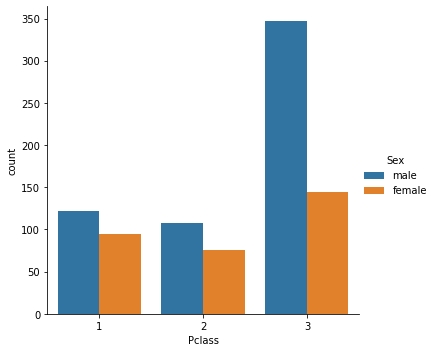

In [6]:
sns.catplot(x = 'Pclass', hue = 'Sex', kind = 'count', data = titanic_df)

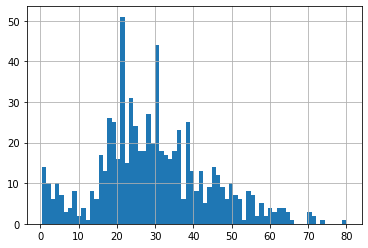

In [7]:
titanic_df['Age'].hist(bins=70)

In [8]:
print("mean: ", titanic_df['Age'].mean())
print("median: ", titanic_df['Age'].median())

mean:  29.69911764705882
median:  28.0


In [9]:
def ischild(person):
    age, sex = person
    if age <= 14:
        return 'Child'
    else:
        return sex

In [10]:
titanic_df['Person'] = titanic_df[['Age', 'Sex']].apply(ischild, axis=1)

In [11]:
titanic_df['Person'].value_counts()

male      538
female    276
Child      77
Name: Person, dtype: int64

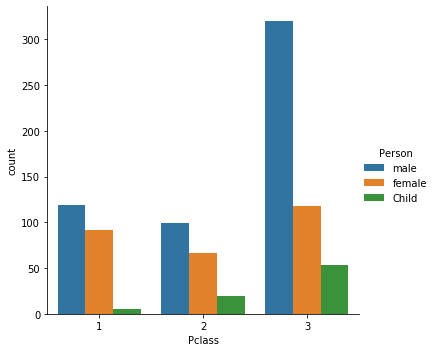

In [12]:
sns.catplot(x = 'Pclass', hue = 'Person', kind = 'count', data = titanic_df)

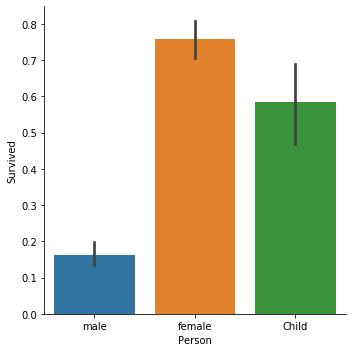

In [13]:
sns.catplot(x = 'Person', y = 'Survived',  kind = 'bar', data = titanic_df)

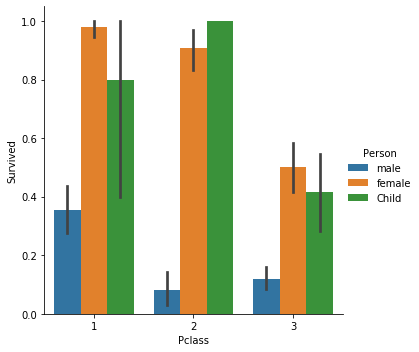

In [14]:
sns.catplot(x='Pclass', y = 'Survived', hue = 'Person', kind = 'bar', data = titanic_df)

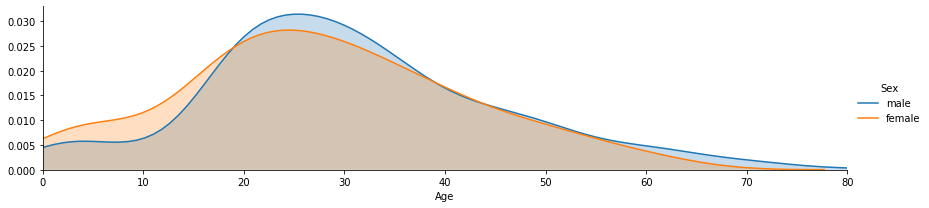

In [15]:
fig = sns.FacetGrid(titanic_df, hue = 'Sex', aspect=4)
fig.map(sns.kdeplot, 'Age', shade = True)
oldest = titanic_df['Age'].max()
fig.set(xlim = (0, oldest))
fig.add_legend()

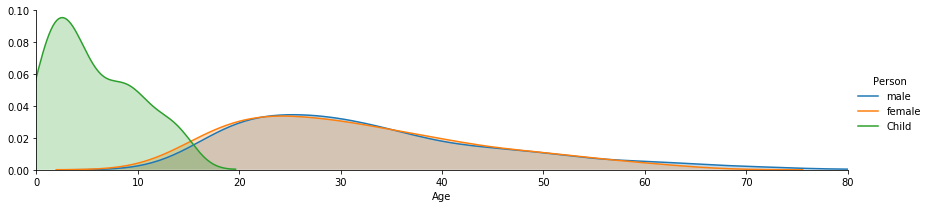

In [16]:
fig = sns.FacetGrid(titanic_df, hue = 'Person', aspect=4)
fig.map(sns.kdeplot, 'Age', shade = True)
oldest = titanic_df['Age'].max()
fig.set(xlim = (0, oldest))
fig.add_legend()

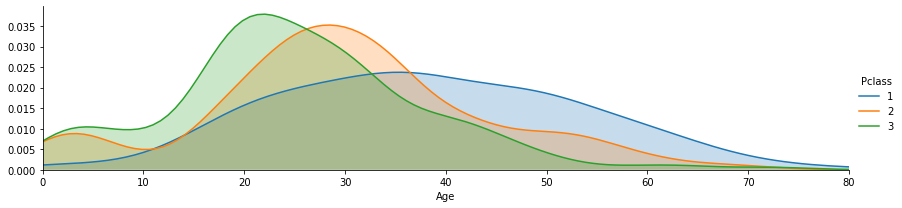

In [17]:
fig = sns.FacetGrid(titanic_df, hue = 'Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age', shade = True)
oldest = titanic_df['Age'].max()
fig.set(xlim = (0, oldest))
fig.add_legend()

# 2 Question
What deck were the passangers on and how does that relate to their class?

In [18]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [19]:
deck = titanic_df['Cabin'].dropna()

In [20]:
deck

1              C85
3             C123
6              E46
10              G6
11            C103
          ...     
871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: Cabin, Length: 204, dtype: object

In [21]:
levels = []
for level in deck:
    levels.append(level[0])
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']

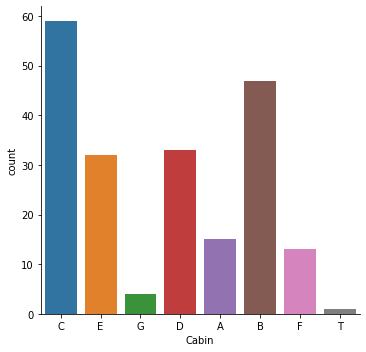

In [22]:
sns.catplot(x = 'Cabin', kind='count', data=cabin_df)

# 3 Question
Where did the passangers come from?

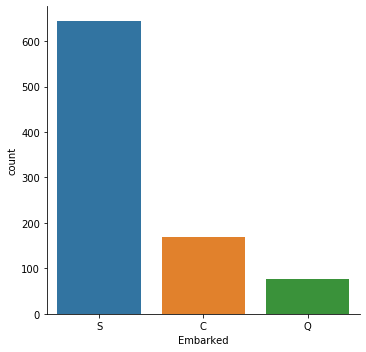

In [23]:
sns.catplot(x = 'Embarked', kind = 'count', data=titanic_df)

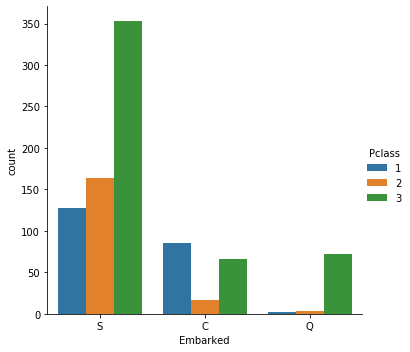

In [24]:
sns.catplot(x = 'Embarked', hue = 'Pclass', kind = 'count', data=titanic_df)

# 4 Question
Who was alone and who was with family?

In [25]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [26]:
def isalone(person):
    si, pa = person
    if si or pa:
        return 'with family'
    else:
        return 'alone'

In [27]:
titanic_df['Family'] = titanic_df[['SibSp', 'Parch']].apply(isalone, axis = 1)

In [28]:
titanic_df['Family Members'] = titanic_df['SibSp'] + titanic_df['Parch']

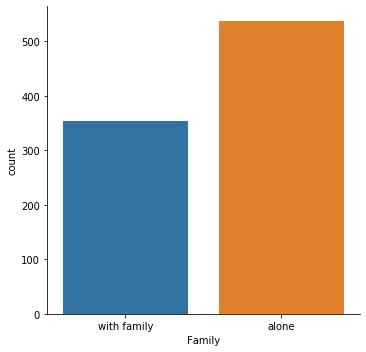

In [29]:
sns.catplot(x = 'Family', kind = 'count', data = titanic_df)

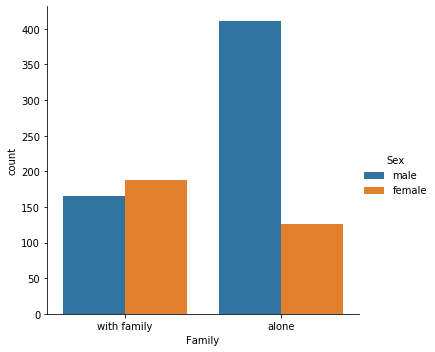

In [30]:
sns.catplot(x = 'Family', kind = 'count', hue = 'Sex', data = titanic_df)

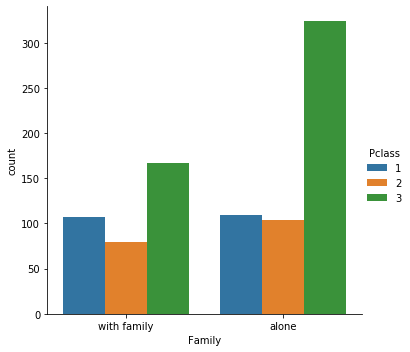

In [31]:
sns.catplot(x = 'Family', kind = 'count', hue = 'Pclass', data = titanic_df)

# 5 Question
What factors helped someone to survive the sinking?

In [32]:
titanic_df['Survivor'] = titanic_df.Survived.map({0: 'No', 1: 'Yes'})

In [33]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Family,Family Members,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with family,1,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with family,1,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,alone,0,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with family,1,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,alone,0,No


/Users/korneytomashchuk/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


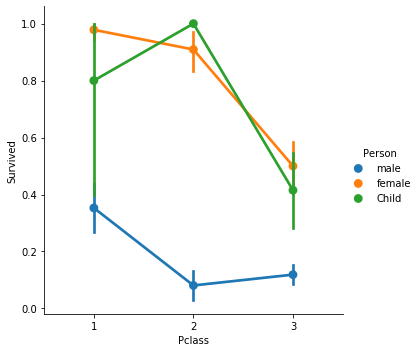

In [34]:
sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'Person', data = titanic_df)

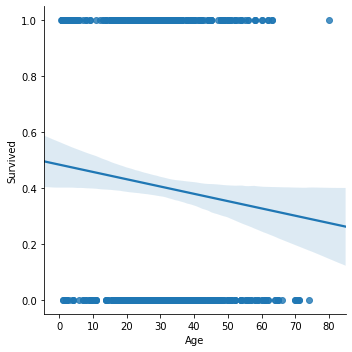

In [35]:
sns.lmplot(x = 'Age', y = 'Survived', data = titanic_df)

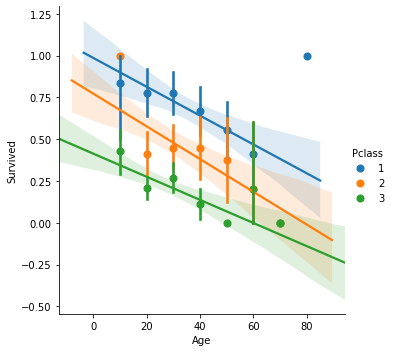

In [36]:
generations = [10, 20, 30, 40, 50, 60, 70, 80]
sns.lmplot(x = 'Age', y = 'Survived', hue = 'Pclass', data = titanic_df, x_bins=generations)

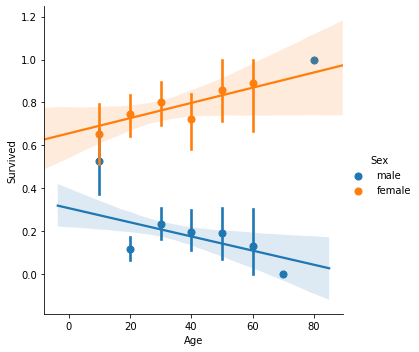

In [37]:
sns.lmplot(x = 'Age', y = 'Survived', hue = 'Sex', data = titanic_df, x_bins=generations)

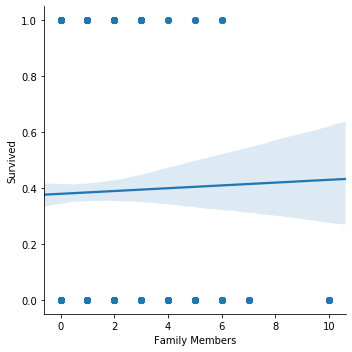

In [38]:
sns.lmplot(x = 'Family Members', y = 'Survived', data = titanic_df)

# Using decision tree to identify the most important factors which helped to survive

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dfr_for_tree = titanic_df[['Pclass', 'Fare', 'Age', 'Sex', 'Survived']]
dfr_for_tree = dfr_for_tree.dropna(axis=0, how='any')

In [41]:
features = dfr_for_tree[['Pclass', 'Fare', 'Age', 'Sex']]
features = features.replace(['male', 'female'], [0, 1])
object_var = dfr_for_tree['Survived']

In [42]:
tree = DecisionTreeClassifier(random_state=241)
tree.fit(features, object_var)
tree.feature_importances_

array([0.14751816, 0.29538468, 0.25658495, 0.30051221])